In [ ]:
#import các thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#tạo df từ dataset churn_prediction
df = pd.read_excel('/content/sample_data/DATA assessment 2.xlsx')
#hiển thị 5 dòng đầu tiên
df.head()

,week,account,active_mex,booking,completed,gmv,grossbilling,mex_spend,grab_spend
0,2020-09-14,A1,1759,438985,381949,4538171,220516,54468,374568
1,2020-09-14,A2,1176,393392,354934,3583448,187806,69091,315987
2,2020-09-14,A3,18896,988044,878425,8661127,588076,185433,737147
3,2020-09-14,A4,560,37204,30882,397346,8314,676,14129
4,2020-09-21,A1,1771,420341,350038,4119369,197731,72783,260398


# Bước 1: Data Cleaning



In [ ]:
#check df
df.describe()

,week,active_mex,booking,completed,gmv,grossbilling,mex_spend,grab_spend
count,48,48.000000,4.800000e+01,48.000000,4.800000e+01,48.000000,48.000000,48.000000
mean,2020-10-22 12:00:00,6080.125000,4.325919e+05,385898.458333,4.116118e+06,241462.354167,83995.250000,304077.895833
min,2020-09-14 00:00:00,560.000000,3.316100e+04,10985.000000,1.353840e+05,4551.000000,83.000000,8497.000000
25%,2020-10-03 06:00:00,1068.000000,2.415655e+05,226810.250000,2.391770e+06,123228.500000,41020.000000,162744.500000
50%,2020-10-22 12:00:00,1548.000000,3.926860e+05,342762.500000,3.814681e+06,191838.000000,73540.500000,262461.500000
75%,2020-11-10 18:00:00,6095.000000,5.792995e+05,519278.250000,5.867162e+06,326633.000000,135812.000000,497795.250000
max,2020-11-30 00:00:00,21797.000000,1.063813e+06,878425.000000,8.661127e+06,591710.000000,185433.000000,737147.000000
std,NaN,8505.582284,3.210665e+05,286776.388959,2.840603e+06,202898.663374,64973.713049,221823.253708


In [ ]:
#Check type
df.dtypes #không có dấu hiệu bất thường
df=df.drop('week', axis = 1)
df=df.drop('account', axis = 1)

In [ ]:
# Kiểm tra các giá trị null
df.isnull().sum()

,0
active_mex,0
booking,0
completed,0
gmv,0
grossbilling,0
mex_spend,0
grab_spend,0


In [ ]:
# Kiểm tra đúp
df.duplicated().sum()
# Ko có dòng bị đúp

0

In [ ]:
#Tách train, test set
x=df.drop('gmv',axis=1) #tạo df x, xóa cột target vari ra khỏi df gốc
y=df['gmv'] #tạo series y là cột target vari
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42) #tách train test tỉ lệ 7/3

In [ ]:
#Normalize từng set train test
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert the scaled arrays back to DataFrames
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Check the scaled data
print(x_train_scaled.head())
print(x_test_scaled.head())

   active_mex   booking  completed  grossbilling  mex_spend  grab_spend
0   -0.658813 -0.278388  -0.401962     -0.479799  -0.506787   -0.408473
1   -0.656475 -0.309509  -0.454496     -0.517587  -0.495898   -0.539957
2   -0.646458 -0.459405  -0.371485     -0.396426  -0.264819   -0.317407
3   -0.713687 -1.321027  -1.344870     -1.248051  -1.391225   -1.442183
4   -0.659480 -0.362850  -0.349995     -0.456026  -0.402958   -0.393157
   active_mex   booking  completed  grossbilling  mex_spend  grab_spend
0   -0.722257 -1.329816  -1.329066     -1.236961  -1.393521   -1.423282
1   -0.593921 -0.110012   0.003216     -0.114497   0.473252    0.380085
2    1.525242  1.259227   1.318515      1.360327   1.172738    1.180586
3   -0.728157 -1.346579  -1.339479     -1.242259  -1.392198   -1.425675
4   -0.594255 -0.180063  -0.166764     -0.227852  -0.144504    0.079006


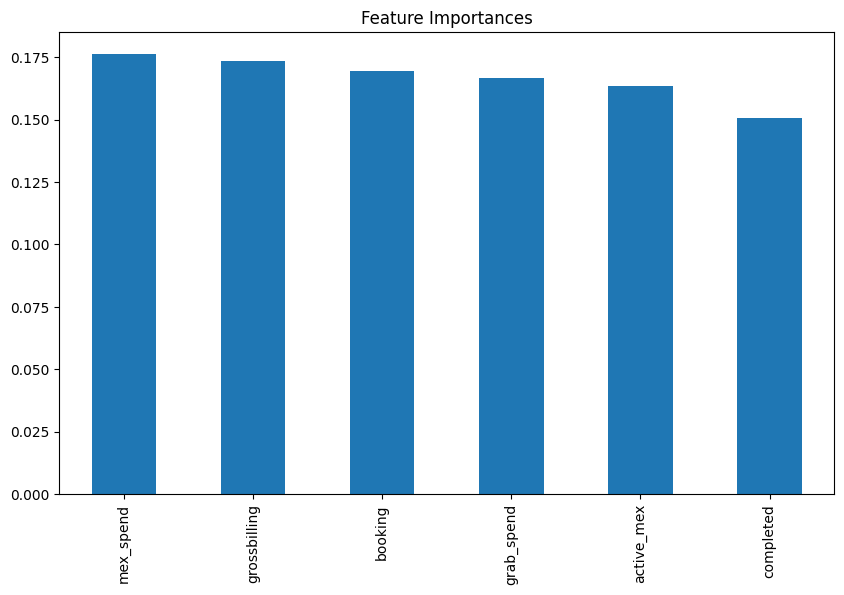

In [ ]:
# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=x_train.columns)

# Sort and plot feature importances
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()